In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('./data/zbiór_5.csv')

In [4]:
df

,szczegolnaFormaPrawna_Symbol,formaWlasnosci_Symbol,pkdKod,wsk_liczba_dni_istnienia,Aktywa,Aktywa_trwale,Wartosci_niematerialne_prawne,Wartosc_firmy,Rzeczowe_aktywa_trwale,Srodki_trwale,...,wsk_struktura_kap_wlasnego_s_1,wsk_struktura_kap_wlasnego_s_2,wsk_zadluzenia,wsk_zob_dlugoterminowe_aktywa_rzeczowe,wsk_zob_oprocentowanych,wsk_zob_oprocentowanych_aktywa_rzeczowe,wsk_struktura_kap_obcego_s,wsk_zob_s_aktywa_rzeczowe,wsk_fin_majatku_kapitalem,default
0,117,214,4671,2647,196590.96,0.00,0.0,0.0,0.00,0.00,...,0.183009,5.291262,4.464217,0.000000,0.508670,0.508670,0.816991,-0.148422,0.183009,1
1,117,214,2849,2066,5000.00,0.00,0.0,0.0,0.00,0.00,...,1.000000,inf,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,1.000000,1
2,117,214,7022,3163,5937.59,0.00,0.0,0.0,0.00,0.00,...,1.000000,inf,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,1.000000,1
3,117,214,6312,1947,281108.61,2262.86,0.0,0.0,0.00,0.00,...,0.161707,0.161707,5.184009,0.838293,0.613571,0.613571,0.838293,0.838293,0.154905,1
4,117,214,6201,2586,1961.43,0.00,0.0,0.0,0.00,0.00,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,117,215,2453,6296,3676900.91,57101.95,0.0,0.0,57101.95,55341.95,...,0.744166,3.318065,0.343787,0.000000,0.000000,0.000000,0.255834,-0.519891,0.740130,0
2996,117,227,5610,5843,398625.64,213498.36,0.0,0.0,0.00,0.00,...,0.293429,0.293429,2.407978,0.706571,0.518839,0.518839,0.706571,0.706571,-0.521425,0
2997,117,0,6622,1926,21809.80,50.00,0.0,0.0,0.00,0.00,...,0.792736,3.019227,0.261454,0.163968,0.000000,0.000000,0.207264,-0.530174,0.792260,0
2998,117,0,4110,1510,49891.33,0.00,0.0,0.0,0.00,0.00,...,0.537149,0.537498,0.861681,0.000000,0.000000,0.000000,0.462851,0.462201,0.537149,0


In [5]:
df['default'].value_counts()

default
0    2822
1     178
Name: count, dtype: int64

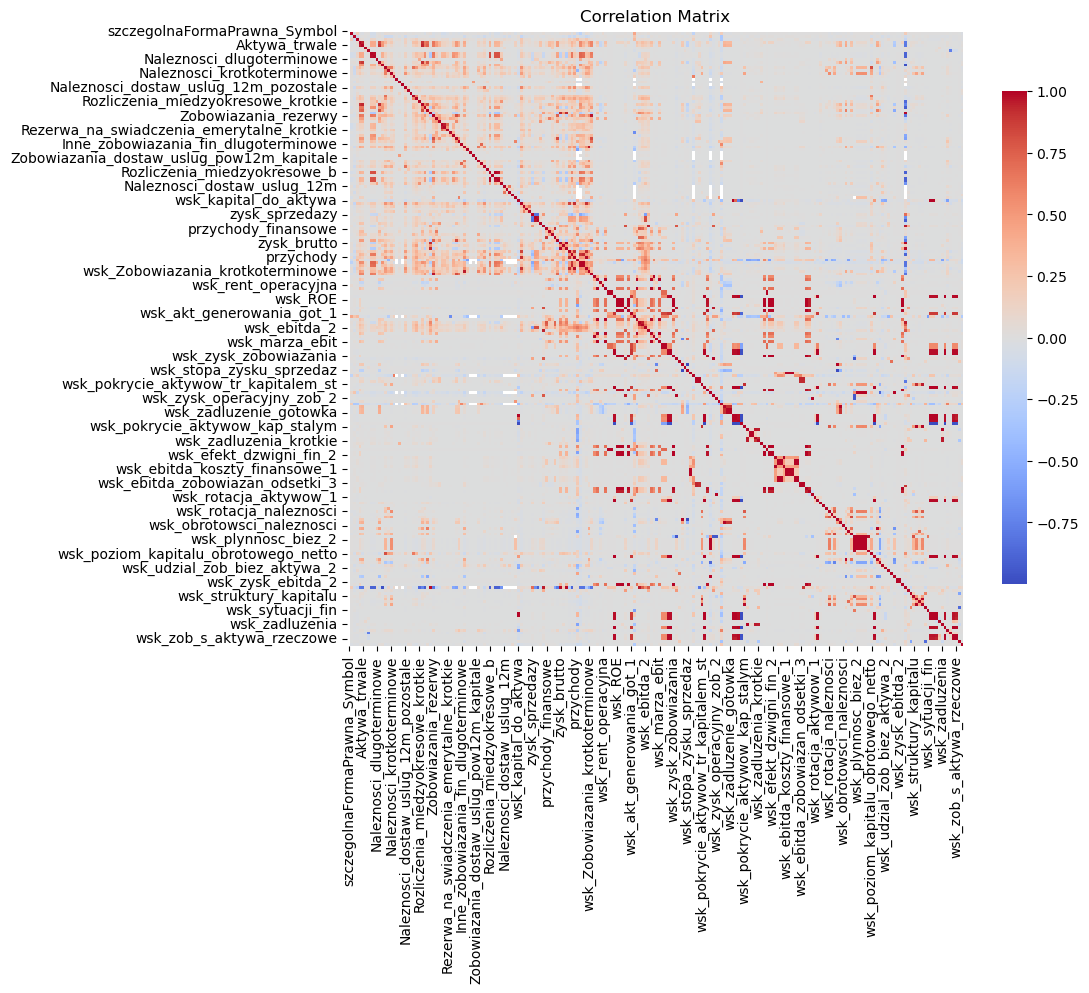

In [6]:
# correlation matrix for all column pairs
corr = df.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=False, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix')
plt.show()

In [7]:
# print out pairs with correlation > 0.75
high_corr_pairs = []
for i in range(len(corr.columns)):
    for j in range(i):
        if corr.iloc[i, j] > 0.75 and i != j:
            high_corr_pairs.append((corr.columns[i], corr.columns[j], corr.iloc[i, j]))

pd.DataFrame(high_corr_pairs, columns=['Feature 1', 'Feature 2', 'Correlation']).sort_values(by='Correlation', ascending=False)

,Feature 1,Feature 2,Correlation
190,wsk_poziom_kosztow_finansowych,wsk_koszty_fin_przychody,1.000000
255,wsk_struktura_kap_wlasnego_1,wsk_udzial_kap_wlasnego_aktywa_1,1.000000
152,wsk_ebitda_zobowiazan_odsetki_2,wsk_ebitda_koszty_odsetkowe_2,1.000000
94,wsk_udzial_kap_wlasnego_aktywa_1,wsk_kapital_do_aktywa,1.000000
93,wsk_zadluzenie_gotowka,wsk_koszty_odsetki_przychody,1.000000
...,...,...,...
244,wsk_zast_kapitalu_wlasnego,wsk_rotacja_naleznosci,0.772029
187,wsk_rotacja_naleznosci,wsk_pokrycie_aktywow_kap_stalym,0.772029
238,wsk_zysk_CF_operacyjny,wsk_ebitda_1,0.771400
247,wsk_zast_kapitalu_stalego,wsk_rotacja_naleznosci,0.761320


In [8]:
def find_correlated_pairs(corr, threshold=0.75):
    correlated_pairs = []
    for i in range(len(corr.columns)):
        for j in range(i):
            if abs(corr.iloc[i, j]) > threshold and i != j:
                correlated_pairs.append((corr.columns[i], corr.columns[j], corr.iloc[i, j]))
    return correlated_pairs

def remove_correlated_features(df, correlated_pairs):
    features_to_remove = []
    for feature1, feature2, _ in correlated_pairs:
        if feature2 not in features_to_remove and feature1 not in features_to_remove:
            features_to_remove.append(feature2)
    return df.drop(columns=features_to_remove)

def remove_all_correlated_features(df, threshold=0.75):
    while True:
        corr = df.corr(numeric_only=True)
        correlated_pairs = find_correlated_pairs(corr, threshold)
        if not correlated_pairs: # if no more correlated pairs, break
            break
        df = remove_correlated_features(df, correlated_pairs)
    return df
    

In [ ]:
# find all numerical columns with inf or -inf values
inf_columns = df.select_dtypes(include=[np.number]).columns.to_series()[np.isinf(df.select_dtypes(include=[np.number])).any()]
print("Columns with inf or -inf values:", inf_columns.tolist())

Columns with inf or -inf values: ['wsk_kapital_do_aktywa', 'wsk_plynnosc_biez_1', 'wsk_struktura_kap_wlasnego_s_2']


In [11]:
df[inf_columns]

,wsk_kapital_do_aktywa,wsk_plynnosc_biez_1,wsk_struktura_kap_wlasnego_s_2
0,0.183009,1.224003,5.291262
1,1.000000,inf,inf
2,1.000000,inf,inf
3,0.161707,inf,0.161707
4,1.000000,inf,1.000000
...,...,...,...
2995,0.744166,3.848076,3.318065
2996,0.293429,inf,0.293429
2997,0.792736,23.043801,3.019227
2998,0.537149,2.160523,0.537498


In [64]:
reduced_df = remove_all_correlated_features(df, threshold=0.75)
print(f"Original number of features: {df.shape[1]}")
print(f"Reduced number of features: {reduced_df.shape[1]}")
reduced_df

Original number of features: 220
Reduced number of features: 110


,szczegolnaFormaPrawna_Symbol,formaWlasnosci_Symbol,pkdKod,wsk_liczba_dni_istnienia,Wartosci_niematerialne_prawne,Naleznosci_dlugoterminowe,Zapasy,Naleznosci_krotkoterminowe,Naleznosci_dostaw_uslug_12m_powiazane,Naleznosci_dostaw_uslug_pow12m_powiazane,...,wsk_zast_kapitalu_podstawowego,wsk_zast_kapitalu_stalego,wsk_sytuacji_fin,wsk_struktura_kap_wlasnego_s_2,wsk_zadluzenia,wsk_zob_oprocentowanych,wsk_zob_oprocentowanych_aktywa_rzeczowe,wsk_zob_s_aktywa_rzeczowe,wsk_fin_majatku_kapitalem,default
0,117,214,4671,2647,0.0,0.00,0.00,6799.49,0.0,0.0,...,500.000000,359.778800,0.002240,5.291262,4.464217,0.508670,0.508670,-0.148422,0.183009,1
1,117,214,2849,2066,0.0,0.00,0.00,0.00,0.0,0.0,...,50.000000,50.000000,0.500000,inf,0.000000,0.000000,0.000000,-1.000000,1.000000,1
2,117,214,7022,3163,0.0,0.00,0.00,0.00,0.0,0.0,...,50.000000,59.375900,0.593759,inf,0.000000,0.000000,0.000000,-1.000000,1.000000,1
3,117,214,6312,1947,0.0,0.00,0.00,111575.06,0.0,0.0,...,8.285974,124.227133,23.770624,0.161707,5.184009,0.613571,0.613571,0.838293,0.154905,1
4,117,214,6201,2586,0.0,0.00,0.00,1961.43,0.0,0.0,...,40.549300,19.614300,0.196143,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,117,215,2453,6296,0.0,0.00,7968.64,746246.30,0.0,0.0,...,9.684433,47.918210,184.392896,3.318065,0.343787,0.000000,0.000000,-0.519891,0.740130,0
2996,117,227,5610,5843,0.0,0.00,20633.09,58250.65,0.0,0.0,...,0.468388,1.867113,0.360100,0.293429,2.407978,0.518839,0.518839,0.706571,-0.521425,0
2997,117,0,6622,1926,0.0,0.00,0.00,2450.00,0.0,0.0,...,100.000000,417.310400,1664.525201,3.019227,0.261454,0.000000,0.000000,-0.530174,0.792260,0
2998,117,0,4110,1510,0.0,0.00,813.01,49045.90,0.0,0.0,...,50.000000,267.990800,0.011605,0.537498,0.861681,0.000000,0.000000,0.462201,0.537149,0


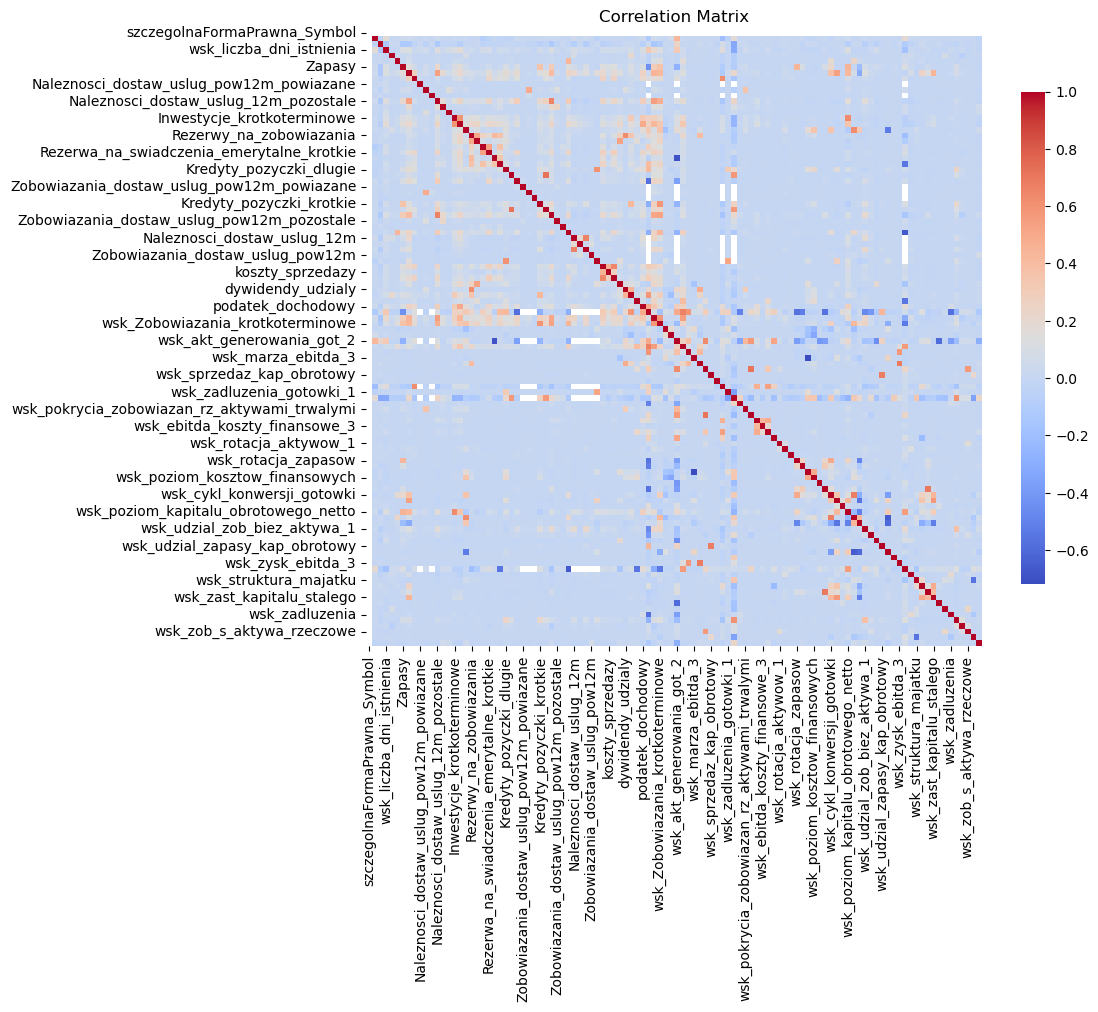

In [65]:
# correlation matrix for reduced dataframe
corr = reduced_df.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=False, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix')
plt.show()

In [66]:
# find the number of categorial vs numerical features
num_numerical = reduced_df.select_dtypes(include=[np.number]).shape[1]
num_categorical = reduced_df.select_dtypes(exclude=[np.number]).shape[1]
print(f"Number of numerical features: {num_numerical}")
print(f"Number of categorical features: {num_categorical}")

Number of numerical features: 108
Number of categorical features: 2


In [67]:
# find categorical column names
categorical_columns = reduced_df.select_dtypes(exclude=[np.number]).columns.tolist()
print("Categorical columns:", categorical_columns)

Categorical columns: ['schemat_wsk_bilans', 'schemat_wsk_rzis']


In [72]:
from sklearn.model_selection import train_test_split

X = reduced_df.drop(columns=['default'])
y = reduced_df['default']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import FunctionTransformer

numerical_features = X.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = X.select_dtypes(exclude=[np.number]).columns.tolist()

def replace_inf(X):
    X = X.copy()
    X[np.isinf(X)] = np.nan
    return X

numerical_pipeline = Pipeline(steps=[
    ('replace_inf', FunctionTransformer(replace_inf)),
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_pipeline = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_pipeline, numerical_features),
        ('cat', categorical_pipeline, categorical_features)
    ])

pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', LogisticRegression(class_weight='balanced'))])
                           
pipeline

,steps,"[('preprocessor', ...), ('classifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


              precision    recall  f1-score   support

           0       0.96      0.65      0.77       564
           1       0.09      0.53      0.15        36

    accuracy                           0.64       600
   macro avg       0.52      0.59      0.46       600
weighted avg       0.90      0.64      0.73       600



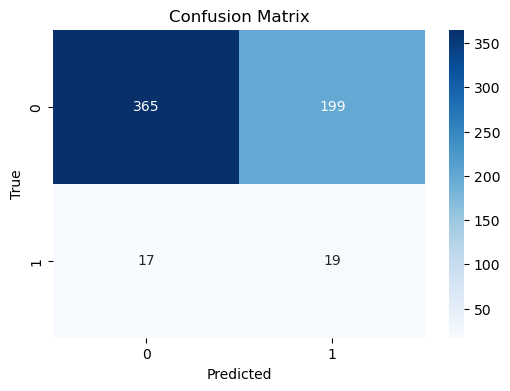

ROC AUC Score: 0.6028


In [74]:
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred))

# confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=pipeline.classes_, yticklabels=pipeline.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# roc_auc score
from sklearn.metrics import roc_auc_score
y_prob = pipeline.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_prob)
print(f"ROC AUC Score: {roc_auc:.4f}")

In [14]:
pd.read_csv("D:\\repo\\XAI_Projekt-1\\slownik_zmiennych_opisy.csv", sep=',')

,Zmienna,Obszar,Krótki opis
0,formaWlasnosci_Symbol,Forma Własności,Symbol określający formę własności podmiotu (n...
1,pkdKod,PKD kod,Kod PKD wskazujący dominujący rodzaj działalno...
2,Pozostale_rezerwy,Pozycja RZiS,Zmiany w rezerwach ujmowane w kosztach operacy...
3,Pozostale_rezerwy_krotkie,Pozycja RZiS,Zmiany w rezerwach ujmowane w kosztach operacy...
4,amortyzacja,Pozycja RZiS,Koszt rozłożenia w czasie wartości środków trw...
...,...,...,...
212,wsk_zysk_ebitda_3,wskaźnik finansowy,EBITDA – wynik operacyjny powiększony o amorty...
213,wsk_zysk_op_zobowiazania,wskaźnik finansowy,Relacja zysku do zobowiązań – zdolność pokrywa...
214,wsk_zysk_operacyjny_zob_1,wskaźnik finansowy,Relacja zysku do zobowiązań – zdolność pokrywa...
215,wsk_zysk_operacyjny_zob_2,wskaźnik finansowy,Relacja zysku do zobowiązań – zdolność pokrywa...
